In [62]:
# Alternative method to install since pip was misbehaving

# import pip
# pip.main(['install', "/Users/hp/Downloads/xgboost-2.1.3-py3-none-win_amd64.whl"])


# Install the en_core_web_sm Model

# You can install the model by running the following Python code:

# import spacy
# spacy.cli.download("en_core_web_sm")

# Load the Model After Installation
# import spacy
# nlp = spacy.load("en_core_web_sm")

# Verify the Installation
# import spacy
# print("en_core_web_sm" in spacy.util.get_installed_models())




SENTIMENT ANALYSIS HAS TO DO WITH FEEDBACK,OPINION WEATHER +0 OR -0

In sentiment analysis they are not labelled, so we label it using polarity

In [63]:
#DATA ANALYSIS LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style, rcParams
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import re
%matplotlib inline
#NLP LIBRARIES

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import spacy
nlp = spacy.load('en_core_web_sm')
#import Twitter and sentiment text libraries
#import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
## machine learning library
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [64]:
df = pd.read_csv('E_Voting')
df.head()

,Unnamed: 0,Electronic_Voting_Tweets
0,0,RT @DailyMonitor: Makerere votes guild amid ti...
1,1,RT @DailyMonitor: Makerere votes guild amid ti...
2,2,RT @DailyMonitor: Makerere votes guild amid ti...
3,3,RT @DailyMonitor: Makerere votes guild amid ti...
4,4,RT @DailyMonitor: Makerere votes guild amid ti...


In [65]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Electronic_Voting_Tweets
0,RT @DailyMonitor: Makerere votes guild amid ti...
1,RT @DailyMonitor: Makerere votes guild amid ti...
2,RT @DailyMonitor: Makerere votes guild amid ti...
3,RT @DailyMonitor: Makerere votes guild amid ti...
4,RT @DailyMonitor: Makerere votes guild amid ti...


In [66]:
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)# removes @mentions
    text = re.sub(r'#',' ', text) # removes the #symbols
    text = re.sub(r'RT[\s]+', '', text)# removes RT
    text = re.sub('https?:\/\/\s+', '', text)# removes any hyperlinks
    text = re.sub('\\n', '', text)# removes \n string
    text = re.sub('#[A-Za-z0-9]+', '', text)# removes any string with a #
    text = re.sub(':', '', text)# removes \n string
    return text

df['Electronic_Voting_Tweets'] = df['Electronic_Voting_Tweets'].apply(cleanText)
df.head()


,Electronic_Voting_Tweets
0,"Makerere votes guild amid tight security, fre..."
1,"Makerere votes guild amid tight security, fre..."
2,"Makerere votes guild amid tight security, fre..."
3,"Makerere votes guild amid tight security, fre..."
4,"Makerere votes guild amid tight security, fre..."


Get the subjectivity or polarity
subjectivity: measures the degree of personal opinion, emotions and bias.
polarity: determine the sentiment opinion about the text, is it positive or negative

In [67]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Electronic_Voting_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Electronic_Voting_Tweets'].apply(getPolarity)
df.head()

,Electronic_Voting_Tweets,Subjectivity,Polarity
0,"Makerere votes guild amid tight security, fre...",0.285714,-0.178571
1,"Makerere votes guild amid tight security, fre...",0.285714,-0.178571
2,"Makerere votes guild amid tight security, fre...",0.285714,-0.178571
3,"Makerere votes guild amid tight security, fre...",0.285714,-0.178571
4,"Makerere votes guild amid tight security, fre...",0.285714,-0.178571


In [68]:
def getLabel(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Label'] = df['Polarity'].apply(getLabel)
df


,Electronic_Voting_Tweets,Subjectivity,Polarity,Label
0,"Makerere votes guild amid tight security, fre...",0.285714,-0.178571,Negative
1,"Makerere votes guild amid tight security, fre...",0.285714,-0.178571,Negative
2,"Makerere votes guild amid tight security, fre...",0.285714,-0.178571,Negative
3,"Makerere votes guild amid tight security, fre...",0.285714,-0.178571,Negative
4,"Makerere votes guild amid tight security, fre...",0.285714,-0.178571,Negative
...,...,...,...,...
595,"2023 Elections 'They stole our BVAS, IREV ide...",0.000000,0.000000,Neutral
596,"2023 Elections 'They stole our BVAS, IREV ide...",0.000000,0.000000,Neutral
597,"2023 Elections 'They stole our BVAS, IREV ide...",0.000000,0.000000,Neutral
598,"2023 Elections 'They stole our BVAS, IREV ide...",0.000000,0.000000,Neutral


In [69]:
df['Label'].value_counts()

Label
Neutral     551
Negative     26
Positive     23
Name: count, dtype: int64

In [70]:
# code to balance the classes
from sklearn.utils import resample

df_pos = df[df['Label'] == 'Positive']
df_neg = df[df['Label'] == 'Negative']
df_neu = df[df['Label'] == 'Neutral']
df_pos_samp = resample(df_pos, n_samples=551)
df_neg_samp = resample(df_neg, n_samples=551)
df = pd.concat([df_neu, df_pos_samp, df_neg_samp])
df = df.sample(frac=1)
df['Label'].value_counts()

Label
Negative    551
Neutral     551
Positive    551
Name: count, dtype: int64

In [71]:
clf1 = Pipeline([('Vectorizer', CountVectorizer()), ('Transformer', TfidfTransformer()), ('Model1', LGBMClassifier())])
clf2 = Pipeline([('Vectorizer', CountVectorizer()), ('Transformer', TfidfTransformer()), ('Model1', XGBClassifier())])
clf3 = Pipeline([('Vectorizer', CountVectorizer()), ('Transformer', TfidfTransformer()), ('Model1', RandomForestClassifier)])                               

In [72]:
# To label the y train
df['Label'] = df['Label'].map({'Positive':'0', 'Neutral':1, 'Negative':2})

In [73]:
x = df.Electronic_Voting_Tweets
y = df['Label']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2)

In [74]:
clf1.fit(xtrain, ytrain)


ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       105
     Neutral       1.00      0.98      0.99       119
    Positive       0.98      1.00      0.99       107

    accuracy                           0.99       331
   macro avg       0.99      0.99      0.99       331
weighted avg       0.99      0.99      0.99       331



<Axes: >

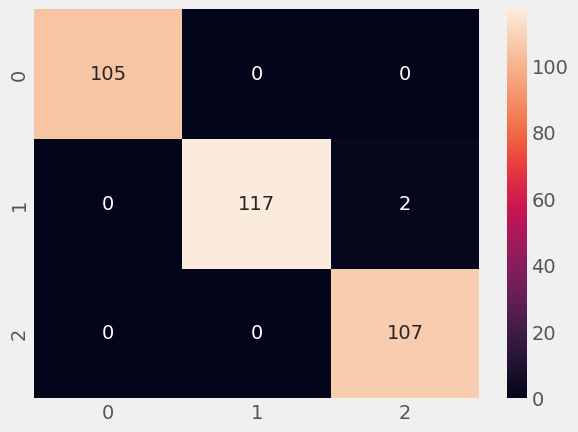

In [ ]:
pred1 = clf1.predict(xtest)
print(classification_report(ytest, pred1))
cm = confusion_matrix(ytest, pred1)
sns.heatmap(cm, annot= True, fmt= '0.5g')

In [76]:
clf2.fit(xtrain, ytrain)

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
pred2 = clf2.predict(xtest)
print(classification_report(ytest, pred2))
cm = confusion_matrix(ytest, pred2)
sns.heatmap(cm, annot= True, fmt= '0.5g')

NotFittedError: need to call fit or load_model beforehand